### Codio Activity 15.7: Gradient Descent with Two Features

**Expected Time = 60 minutes**

**Total Points = 40**

This activity focuses on using gradient descent with two features to find the optimal parameters for a regression model.  You will use the formulas for the gradients given in the lecture together with a small synthetic dataset to explore building a regression model with two variables.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sy
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression

### The Data

Below, a simple dataset is created around the line $y = 4.1x + 12.5 + \epsilon$ where $\epsilon$ are randomly generated values drawn from a Normal distribution $N(0, 2)$.  This means we want our model to uncover something close to $\theta_0 = 12.5$ and $\theta_1 = 4.1$.

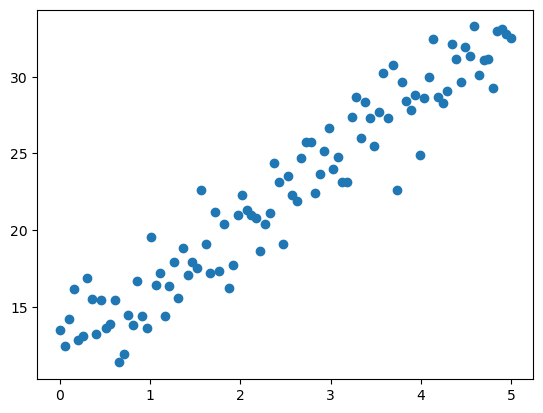

In [4]:
np.random.seed(42)
x = np.linspace(0, 5, 100)
y = 12.5 + 4.1*x + np.random.normal(size = 100, scale = 2)
plt.scatter(x, y)

[Back to top](#-Index)

### Problem 1

#### Adding a Bias Term

**10 Points**

Your two variable model will use a column of ones to stand in as the multiplier of $\theta_0$.  Create a DataFrame with columns `['bias', 'x']` that contains a column of ones and the data `x`. Assign the result to the variable `X`.

In [ ]:
### GRADED

X = np.concatenate((np.ones((len(x), 1)), x.reshape(-1, 1)), axis = 1)
X = pd.DataFrame(X, columns = ['bias', 'x'])

# Answer check
X.head()

[Back to top](#-Index)

### Problem 2

#### Gradient of MSE

**10 Points**

Complete the function `mse_grad` below.  This function takes as input:

- `theta`: A NumPy array containing the two parameters of the linear regression model.
- `x`: A pandas DataFrame containing the input features.
- `y`: A pandas Series or numpy array containing the target values.

This function should extract the first and second columns of the input DataFrame `x` into variables `x0` and `x1`, respectively.

Then, the function should calculate the partial derivatives with respect to `theta[0]` and `theta[1]` according to the formulas:

$$\frac{\partial}{\partial \theta_0} l(\overrightarrow{\theta}, \overrightarrow{x}, y_i) = 2(y_i - \theta_0x_0 - \theta_1x_1)(-x_0)$$

$$\frac{\partial}{\partial \theta_1} l(\overrightarrow{\theta}, \overrightarrow{x}, y_i) = 2(y_i - \theta_0x_0 - \theta_1x_1)(-x_1)$$

Assign these derivatives to `dt0` and ` dt1`, respectively.

You function should return a NumPy array with elements `dt0` and ` dt1`.


Remember to find the mean of the gradient array.

In [6]:
### GRADED

# YOUR CODE HERE
def mse_grad(theta, x, y):
    x0 = x.iloc[:, 0]
    x1 = x.iloc[:, 1]
    dt0 = np.mean(-2*(y - theta[0]*x0 - theta[1]*x1)*x0)
    dt1 = np.mean(-2*(y - theta[0]*x0 - theta[1]*x1)*x1)
    return np.array([dt0, dt1])

# Answer check
mse_grad(np.array([0, 0]), X, y)

NameError: name 'X' is not defined

[Back to top](#-Index)

### Problem 3

#### Gradient Descent

**10 Points**

Use the initial value for `theta` and a learning rate of `lr = 0.01` to perform 1000 iterations of gradient descent.  Keep track of the updated array of theta as `thetas` below.  Recall the gradient descent formula as:

$$\theta_{i + 1} = \theta_{i} - lr*grad(mse(\theta_{i}))$$

In [ ]:
### GRADED

# YOUR CODE HERE
theta = np.array([0, 0])
thetas = []
lr = 0.01
for i in range(1000):
    thetas.append(theta)
    theta = theta - lr*mse_grad(theta, X, y)

# Answer check
thetas[-3:]

[Back to top](#-Index)

### Problem 4

#### DataFrame of updates

**10 Points**

Below, create a dataframe `thetas_df` that contains the value stored in `thetas`. Name the columns of this dataframe `intercept` and `slope`.  

In [ ]:
### GRADED

thetas_df = ''
# YOUR CODE HERE
thetas_df = pd.DataFrame(thetas, columns = ['intercept', 'slope'])

# Answer check
thetas_df.tail(1)

#### Comparing with `sklearn`

Below, a regression model from sklearn is fit and the coefficients are shown.  These should be very close to what your gradient descent routine found.  To get closer feel free to experiment with the learning rate and number of iterations.  Beware that too many iterations and too small a learning rate will be very slow to train!

In [ ]:
lr = LinearRegression(fit_intercept=False).fit(X, y)
lr.coef_